In [12]:
!pip install firebase-admin
import firebase_admin
from firebase_admin import credentials, db
from datetime import datetime  # Untuk konversi timestamp ke human-readable
import pandas as pd
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [2]:
# Konfigurasi database tujuan
dest_cred = credentials.Certificate("/work/staklimjerukagung-firebase-admin.json")
dest_app = firebase_admin.initialize_app(dest_cred, {
    'databaseURL': 'https://staklimjerukagung-default-rtdb.asia-southeast1.firebasedatabase.app/'
})

In [16]:
# Referensi ke data sumber
source_ref = db.reference('/auto_weather_stat/id-03/data')

# Mengambil data dari database sumber
source_data = source_ref.get()

# Mengubah data menjadi DataFrame pandas
if source_data:
    # Mengubah data menjadi DataFrame
    df = pd.DataFrame.from_dict(source_data, orient='index')
    
    # Jika 'timestamp' sudah ada, jangan pindahkan indeks ke kolom
    if 'timestamp' not in df.columns:
        df.index.name = 'timestamp'  # Mengatur nama indeks
        df.reset_index(inplace=True)  # Memindahkan indeks menjadi kolom biasa
    
    print(df.tail())  # Menampilkan data untuk verifikasi
else:
    print("Tidak ada data di jalur /auto_weather_stat/id-03/data.")

                 dew humidity pressure temperature   timestamp  volt  humi  \
1740278593  27.41544    91.77  1012.66       28.89  1740278593  4.13   NaN   
1740278653  27.34417    90.86  1012.64       28.99  1740278653  4.13   NaN   
1740278713  27.17282    89.64  1012.62       29.05  1740278713  4.12   NaN   
1740278773  27.25672    89.77  1012.63       29.11  1740278773  4.13   NaN   
1740278833  27.38128    90.48  1012.65        29.1  1740278833  4.13   NaN   

            pres  temp  
1740278593   NaN   NaN  
1740278653   NaN   NaN  
1740278713   NaN   NaN  
1740278773   NaN   NaN  
1740278833   NaN   NaN  


In [22]:
df.tail(10)

,dew,humidity,pressure,temperature,timestamp,volt,humi,pres,temp
1740278354,27.35533,93.54,1012.71,28.5,1740278354,4.13,NaN,NaN,NaN
1740278413,27.29397,92.88,1012.63,28.56,1740278413,4.13,NaN,NaN,NaN
1740278414,27.29397,92.88,1012.63,28.56,1740278414,4.13,NaN,NaN,NaN
1740278473,27.66844,94.17,1012.72,28.7,1740278473,4.13,NaN,NaN,NaN
1740278533,27.45192,92.34,1012.69,28.82,1740278533,4.13,NaN,NaN,NaN
1740278593,27.41544,91.77,1012.66,28.89,1740278593,4.13,NaN,NaN,NaN
1740278653,27.34417,90.86,1012.64,28.99,1740278653,4.13,NaN,NaN,NaN
1740278713,27.17282,89.64,1012.62,29.05,1740278713,4.12,NaN,NaN,NaN
1740278773,27.25672,89.77,1012.63,29.11,1740278773,4.13,NaN,NaN,NaN
1740278833,27.38128,90.48,1012.65,29.1,1740278833,4.13,NaN,NaN,NaN


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 716778 entries, 0 to 1740278833
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dew          716778 non-null  object 
 1   humidity     716774 non-null  object 
 2   pressure     716774 non-null  object 
 3   temperature  716774 non-null  object 
 4   timestamp    716778 non-null  object 
 5   volt         716778 non-null  object 
 6   humi         4 non-null       float64
 7   pres         4 non-null       float64
 8   temp         4 non-null       float64
dtypes: float64(3), object(6)
memory usage: 54.7+ MB


In [6]:
df = df[(df['temperature'] >= 10) & 
                      (df['humidity'] >= 0) & 
                      (df['pressure'] >= 1000) & 
                      (df['dew'] >= 10) &
                      (df['volt'] >= 0)]

In [20]:
# Membuat DataFrame awal
data = pd.DataFrame(df)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# Membuat rentang waktu yang lengkap dengan interval per menit
complete_range = pd.date_range(start=data.index.min(), end=df.index.max(), freq='T')

# Reindexing dengan rentang waktu lengkap, variabel lain akan terisi NaN
df = df.reindex(complete_range)

# Menampilkan hasil
print(df.head(15))

/tmp/ipykernel_392/737626841.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['timestamp'] = pd.to_datetime(df['timestamp'])


DateParseError: day is out of range for month: 0, at position 0

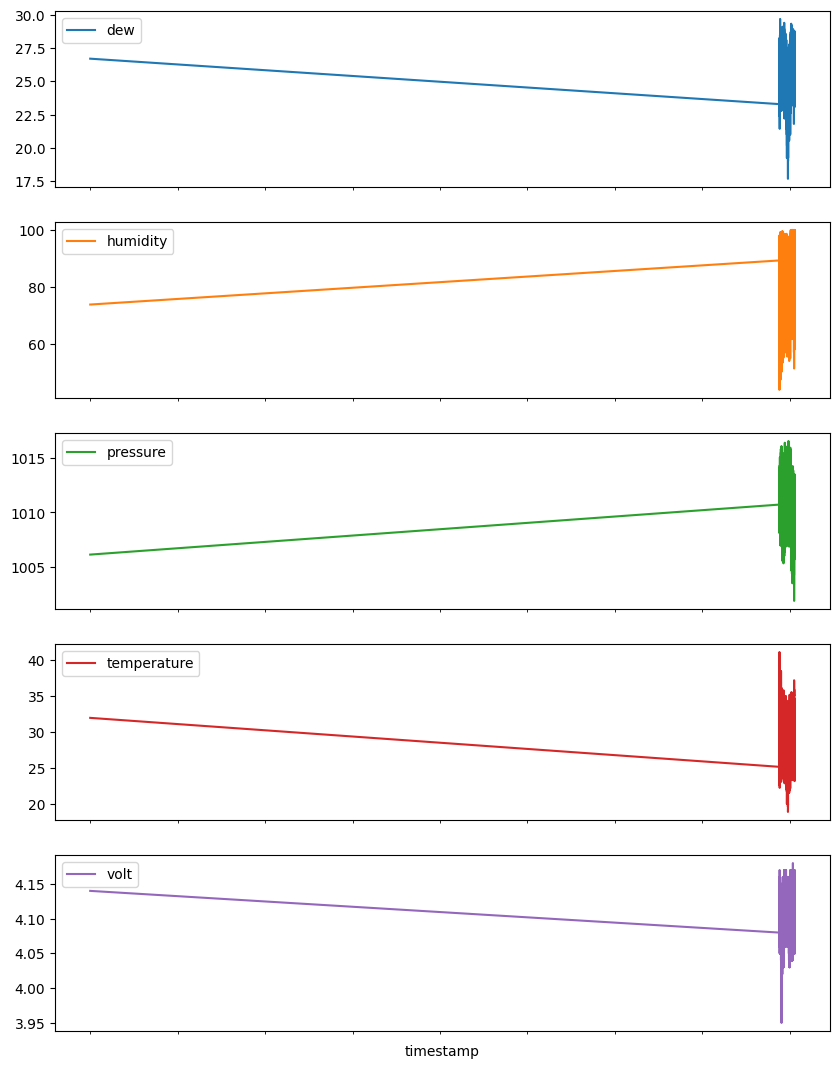

In [8]:
# Plot line chart
df.plot(y=['dew', 'humidity', 'pressure', 'temperature', 'volt'], subplots=True, figsize=(10, 15))
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=200afad5-8991-4e20-8a55-8751c7aff3b5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>